In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.dpi'] = 400
import numpy as np

vaccine_rename = {'Mosaic-8b in naïve NHPs' : "Mosaic-8b\nprime & boost",
                  'Mosaic-8b in prevaxxed NHPs': "Mosaic-8b\nboost",
                  'Homotypic SARS-2 Beta in prevaxxed NHPs':  "Homotypic\nboost",
                  'WA.1/BA.5 mRNA in prevaxxed NHPs': "Bivalent mRNA\nboost"}

In [4]:
df = pd.read_csv("../Data/Supp_TableS8_NHP_neutralization.csv")
df = df.replace("<20", 10)

cols = df.filter(regex= "ID50").columns.tolist()
df = df[["Sample ID", "Label"] + cols].copy()

for c in cols:
    try:
        df[c] = df[c].str.replace(',', '').astype(int)
    except:
        pass

df.columns = [i.split("/")[0] for i in df.columns]
df_id50 = df.melt(["Sample ID", "Label"], var_name = "construct", value_name = "ID50")
df_id50["Label"] = df_id50.Label.replace(vaccine_rename)
df_id50

,Sample ID,Label,construct,ID50
0,A20056,Homotypic\nboost,WuG,121021
1,A20057,Homotypic\nboost,WuG,6002
2,A20058,Mosaic-8b\nboost,WuG,69111
3,A20060,Homotypic\nboost,WuG,81425
4,A20063,Bivalent mRNA\nboost,WuG,39977
...,...,...,...,...
121,A20068,Mosaic-8b\nboost,XBB-10b,113
122,A20069,Homotypic\nboost,XBB-10b,79
123,A20070,Bivalent mRNA\nboost,XBB-10b,118
124,A20071,Bivalent mRNA\nboost,XBB-10b,10


In [5]:
panel_geomean = df_id50.groupby(["construct", "Label"]).agg({'ID50':stats.gmean
                                                              }).reset_index()
panel_geomean

,construct,Label,ID50
0,BA.2.12.1,Bivalent mRNA\nboost,875.826488
1,BA.2.12.1,Homotypic\nboost,1554.752707
2,BA.2.12.1,Mosaic-8b\nboost,2624.780926
3,BA.2.12.1-2d,Bivalent mRNA\nboost,695.437441
4,BA.2.12.1-2d,Homotypic\nboost,813.138193
5,BA.2.12.1-2d,Mosaic-8b\nboost,2677.413414
6,BA.2.75,Bivalent mRNA\nboost,1501.056428
7,BA.2.75,Homotypic\nboost,2030.902172
8,BA.2.75,Mosaic-8b\nboost,3312.998804
9,BA.2.75-4c,Bivalent mRNA\nboost,1098.518827


In [6]:
mosaic_dict = dict(zip(panel_geomean[panel_geomean.Label == "Mosaic-8b\nboost"].construct, 
                     panel_geomean[panel_geomean.Label == "Mosaic-8b\nboost"].ID50))

In [7]:
panel_geomean["ID50_mosaic"] = panel_geomean["construct"].replace(mosaic_dict)
panel_geomean["FC_mosaic"]   = panel_geomean["ID50_mosaic"] / panel_geomean["ID50"]
panel_geomean["const/voc"] = ["designed" if "-" in i else "VoC" for i in panel_geomean["construct"]]
panel_geomean["color"]     = ["darkred" if "-" in i else "0.5" for i in panel_geomean["construct"]]

In [8]:
color_dict = panel_geomean.set_index('construct')['color'].to_dict()
color_dict

{'BA.2.12.1': '0.5',
 'BA.2.12.1-2d': 'darkred',
 'BA.2.75': '0.5',
 'BA.2.75-4c': 'darkred',
 'BA.5': '0.5',
 'BA.5-2a': 'darkred',
 'WuG': '0.5',
 'XBB': '0.5',
 'XBB-10b': 'darkred'}

In [13]:
panel_geomean["x_var"] = [1 if "-" in i else 0 for i in panel_geomean["construct"]]

pairs = {'BA.2.12.1': 'BA.2.12.1-2d', 
          'BA.2.75' : 'BA.2.75-4c', 
          'BA.5': 'BA.5-2a', 
          'XBB': 'XBB-10b',
          'WuG': 'WuG'}

<ipython-input-28-0e3f6b422acc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['x_var'] = x['x_var'] + noise


In [29]:
x

,construct,Label,ID50,ID50_mosaic,FC_mosaic,const/voc,color,x_var
1,BA.2.12.1,Homotypic\nboost,1554.752707,2624.780926,1.688230,VoC,0.5,-0.167168
4,BA.2.12.1-2d,Homotypic\nboost,813.138193,2677.413414,3.292692,designed,darkred,1.008759
7,BA.2.75,Homotypic\nboost,2030.902172,3312.998804,1.631294,VoC,0.5,0.220911
10,BA.2.75-4c,Homotypic\nboost,1100.847752,2186.468320,1.986168,designed,darkred,1.025432
13,BA.5,Homotypic\nboost,1308.600106,1870.765790,1.429593,VoC,0.5,0.041314
16,BA.5-2a,Homotypic\nboost,640.092838,951.524007,1.486541,designed,darkred,0.911877
19,WuG,Homotypic\nboost,22935.125925,14586.427280,0.635986,VoC,0.5,0.127130
22,XBB,Homotypic\nboost,224.386537,216.767038,0.966043,VoC,0.5,0.024131
25,XBB-10b,Homotypic\nboost,81.490661,159.736002,1.960176,designed,darkred,0.943837


<ipython-input-34-01b54e9646c1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['x_var'] = x['x_var'] + noise


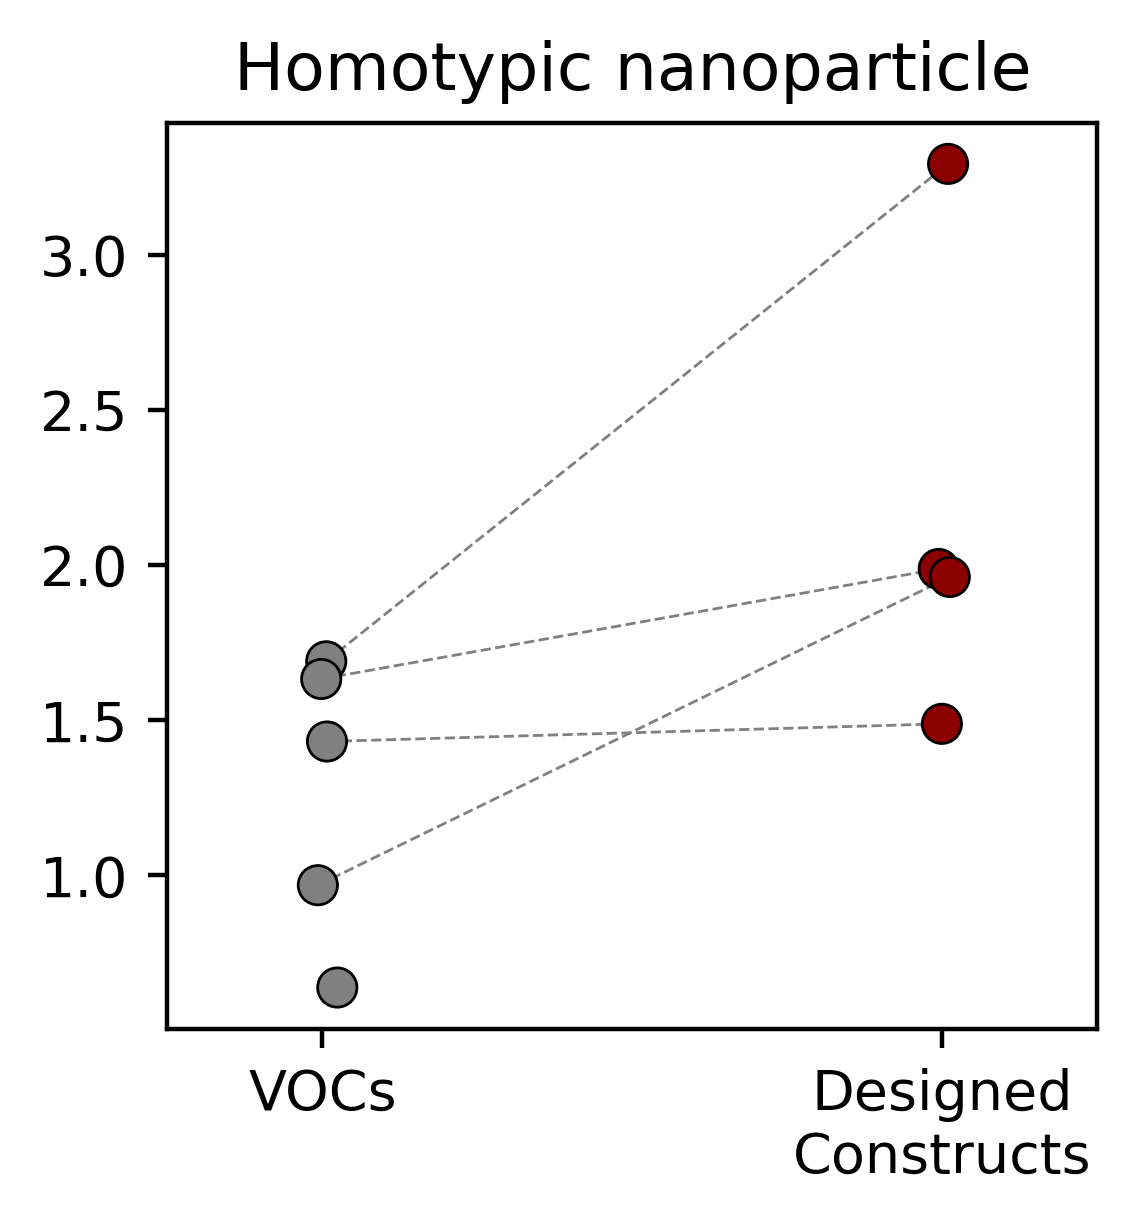

In [34]:
fig, axes = plt.subplots(1,1, sharey = True, sharex = True, figsize = (3,3))


## subplot B## 
x = panel_geomean[panel_geomean.Label == "Homotypic\nboost"]
x = panel_geomean[panel_geomean.Label == "Homotypic\nboost"]

noise = np.random.normal(0, 0.015, size=len(x))  # Generate random noise
x['x_var'] = x['x_var'] + noise


axes.scatter(x = x["x_var"], y = x["FC_mosaic"], color = x["color"], 
             edgecolor = 'k', linewidth = 0.5, s = 50) 

for i in pairs:
    axes.plot([x[x.construct == i]["x_var"].values, x[x.construct == pairs[i]]["x_var"].values],
             [x[x.construct == i]["FC_mosaic"].values, x[x.construct == pairs[i]]["FC_mosaic"].values], 
            color = "grey", linestyle = "--", linewidth = 0.5, zorder = 0)

axes.set_xlabel("")
axes.set_title("Homotypic nanoparticle")

axes.set_xticks([0,1]) 
axes.set_xticklabels(["VOCs", "Designed\nConstructs"])

plt.xlim(-0.25, 1.25)
plt.savefig('../Figures/Fig4D_mosaic_v_homotypic.svg', format='svg', layout = "tight")